In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import tensorflow as tf
import cv2
import torch
from tqdm import tqdm

/home/senju/miniconda3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('/media/senju/1.0 TB Hard Disk/UniversitiOfMalaya_Computer_Vision_Research/Scenary_Classification(Pytorch)/train-scene classification/train.csv')
data.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [3]:
file_path = "/media/senju/1.0 TB Hard Disk/UniversitiOfMalaya_Computer_Vision_Research/Scenary_Classification(Pytorch)/train-scene classification/train"
classes = {
   0 : "Buildings",
1: "Forests",
2: "Mountains" ,
3 : "Glacier" , 
4 : "Street",
5 : "Sea"
}

In [4]:
classes.keys()

dict_keys([0, 1, 2, 3, 4, 5])

In [5]:
data['label'].value_counts()

3    3037
2    2957
5    2883
4    2784
1    2745
0    2628
Name: label, dtype: int64

In [6]:
#plot multiple images
def plot_images(images, nrows, ncols, figsize=(12, 12)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [7]:
#load images from dataset
images = []
for i in tqdm(data['image_name'],colour='red'):
    # print(file_path+"/"+i)
    try:
        img = cv2.imread(file_path+"/"+i)
        # images.append(img.values)
        # print(img.shape)
        img = cv2.resize(img, (150, 150))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    except:
        print(i)
        print("Error loading image")
        continue

# images = np.array(images)

100%|██████████| 17034/17034 [00:53<00:00, 317.83it/s] 


In [8]:
img.shape

(150, 150, 3)

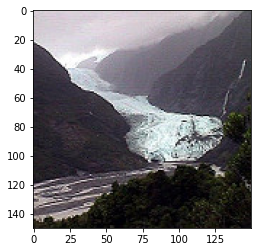

In [9]:
plt.imshow(img)

In [10]:
print(classes[data['label'][-1:].values[0]])

Mountains


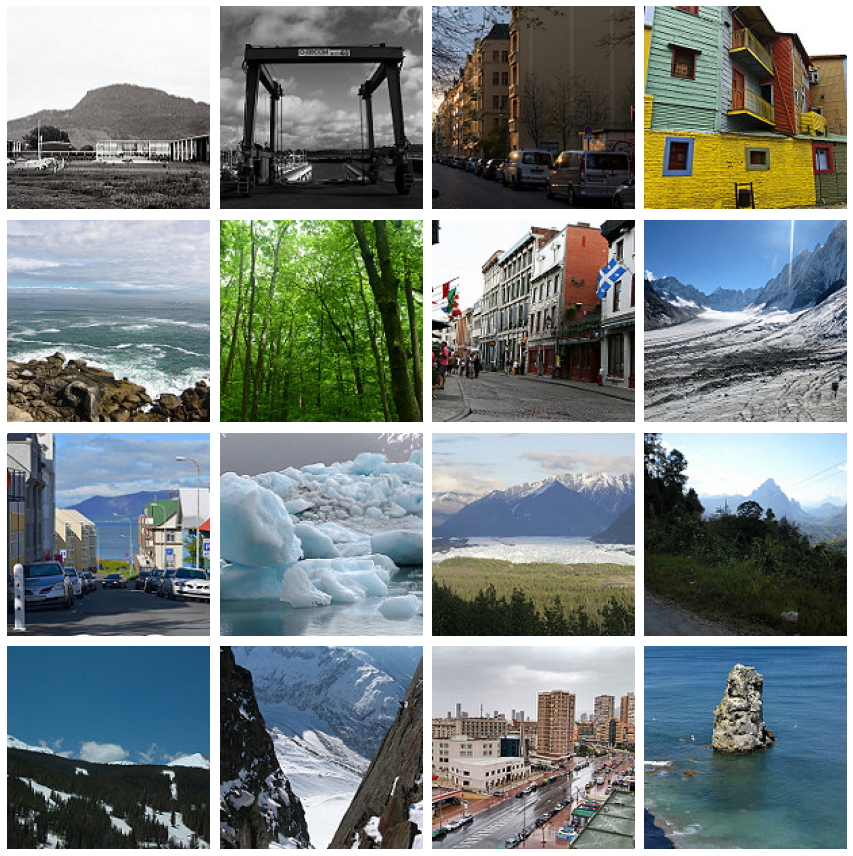

In [11]:
#plot multiple images
plot_images(images, nrows=4, ncols=4, figsize=(12, 12))

In [12]:
type(images)

list

In [13]:
data['label'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17034 entries, 0 to 17033
Series name: label
Non-Null Count  Dtype
--------------  -----
17034 non-null  int64
dtypes: int64(1)
memory usage: 133.2 KB


In [14]:
images = np.asarray(images)

In [15]:
images.shape

(17034, 150, 150, 3)

In [16]:
#save it as numpy array
np.save('images.npy', images)
np.save('labes.npy', data['label'].values)